## NumPy, Pandas - exercises
### BIOINF 575 - Fall 2022



In [3]:
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from '/U<...>ages/pandas/__init__.py'>


In [2]:
import pandas as pd

In [4]:
pd.read_clipboard()

,Sample1,Sample2,Sample3,Sample4,Sample5
HER2,37.454012,95.071431,73.199394,59.865848,15.601864
PIK3CA,15.599452,5.808361,86.617615,60.111501,70.807258
BRAF,2.058449,96.990985,83.244264,21.233911,18.182497
IL6,18.340451,30.424224,52.475643,43.194502,29.122914


___

#### Processing the worm genome file - using pandas
You will do a quick exploration of the data in the the GFF3 file for the C. elegans genome. The GFF3 file is `Caenorhabditis_elegans.WBcel235.91.gff3` and is also available in the github repository (you should have it in the study session if you updated the repo). The GFF3 format is described on:
https://github.com/The-Sequence-Ontology/Specifications/blob/master/gff3.md.<br> 

After the comment and header lines (marked by "#"), a line in a GFF3 file (row of a table) is composed of 9 tab-delimited fields (columns). The first 8 are called features. These are all atomic (consist of only one element), so they get put into a dictionary features with no problems. You will need to define a key and you will have to generate those integers as you read the file in and add data to the dictionary.

The ninth field will pose more of a problem. It consists of tag-value pairs. **The tag-value pairs are separated by a semi-colon, ";". The the tag and value in a pair are  separated by equal signs, "=", and the values may consist of mulitiple, comma, ",", separated entries.** Also, any value may be encoded as html-safe encoding. Caution: the encoded characters may be the same as those used to separate the components of the attributes field. To get rid of the encoding (these are  pairs of characters or digits preceded by the % sign), use the unquote() function from urllib.parse (`from urllib.parse import unquote`). Just be careful of when you use it - do it at the wrong time and you will mess up the parsing of attributes.

From the definition of the GFF3 we have these fields

Each line contains the following information for a genomic features:  `seqid, source, type, start, end, score, strand, phase, attributes`.


The attributes column contains the following information: ;-separated pairs of tag=value, where the values may consist of mulitiple, comma, ",", separated entries.




____

### <font color = "red">Exercise</font>

#### - Load data from the file and get it ready for analysis:
- Open the `Caenorhabditis_elegans.WBcel235.91.gff3` and check the format.
- Read the data from the `Caenorhabditis_elegans.WBcel235.91.gff3` into a dataframe.
- Set the column names to: ` seqid, source, type, start, end, score, strand, phase, attributes`. 
- Set the row names to: `Feature0, ..., FeatureX, ... FeatureN`, where X is the row index and N the number of rows.




In [1]:
import numpy as np
import pandas as pd


#help(pd.read_csv)

# Also you can use the: contextual help 
# right click the notebook select > show contextual help
# select the tab of the contextual help from the tabs of the opened files
# drag and drop it to the right of your notebook window
# you should have something that looks like a split screen 
# with your notebook to the left anf the contextual help window on the right
# now on a cell in the notebook write a function name like abs, or print 
# - the help for the function should show in the right window  (contextual help window)



In [2]:
worm_genome_filenme = "Caenorhabditis_elegans.WBcel235.91.gff3"

worm_genome_df = pd.read_csv(worm_genome_filenme, comment = "#", sep = "\t", header = None)
worm_genome_df

,0,1,2,3,4,5,6,7,8
0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [13]:
column_labels = ("seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes")
worm_genome_df.columns = column_labels
worm_genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [14]:
type(worm_genome_df.shape)

tuple

In [15]:
n_rows = worm_genome_df.shape[0]
n_rows

659621

In [16]:
row_labels = ["Feature" + str(i) for i in range(n_rows)]
row_labels

['Feature0',
 'Feature1',
 'Feature2',
 'Feature3',
 'Feature4',
 'Feature5',
 'Feature6',
 'Feature7',
 'Feature8',
 'Feature9',
 'Feature10',
 'Feature11',
 'Feature12',
 'Feature13',
 'Feature14',
 'Feature15',
 'Feature16',
 'Feature17',
 'Feature18',
 'Feature19',
 'Feature20',
 'Feature21',
 'Feature22',
 'Feature23',
 'Feature24',
 'Feature25',
 'Feature26',
 'Feature27',
 'Feature28',
 'Feature29',
 'Feature30',
 'Feature31',
 'Feature32',
 'Feature33',
 'Feature34',
 'Feature35',
 'Feature36',
 'Feature37',
 'Feature38',
 'Feature39',
 'Feature40',
 'Feature41',
 'Feature42',
 'Feature43',
 'Feature44',
 'Feature45',
 'Feature46',
 'Feature47',
 'Feature48',
 'Feature49',
 'Feature50',
 'Feature51',
 'Feature52',
 'Feature53',
 'Feature54',
 'Feature55',
 'Feature56',
 'Feature57',
 'Feature58',
 'Feature59',
 'Feature60',
 'Feature61',
 'Feature62',
 'Feature63',
 'Feature64',
 'Feature65',
 'Feature66',
 'Feature67',
 'Feature68',
 'Feature69',
 'Feature70',
 'Feature71',
 '

In [17]:
worm_genome_df.index = row_labels
worm_genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [18]:
# pd.read_csv?

___

### - Compute how many types of genomic features there are in our dataset and how many features of each kind. (e.g.: gene, exon, mRNA in the third column in the file are feature types)


#### If you are trying to do a common operation on a dataframe or Series (dataframe column) it may have already been implemented - look for a function that does what you need in the documentation.

Useful links to see the attributes (variables, properties) and methods (functions) a column of a pandas dataframe (Series) and a pandas dataframe has:    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [19]:
# pandas.core.series.Series.nunique(dropna: bool = True) -> int
# Returns the number of unique elements in the object.
# Excludes NA values by default.

worm_genome_df.type.nunique()


19

In [20]:
#pandas.core.series.Series.value_counts(
#    normalize=False,
#    sort=True,
#    ascending=False,
#    bins=None,
#    dropna=True,
#)

#Returns a Series containing counts of unique values.
# The resulting object will be in descending order so that the
# first element is the most frequently-occurring element.
# Excludes NA values by default.



In [21]:
worm_genome_df.type.value_counts()

exon                      269904
CDS                       222859
mRNA                       33391
five_prime_UTR             30960
three_prime_UTR            28004
ncRNA_gene                 24765
gene                       20222
piRNA                      15364
ncRNA                       8402
pseudogenic_transcript      1827
pseudogene                  1791
tRNA                         634
miRNA                        454
snoRNA                       345
lnc_RNA                      283
pre_miRNA                    257
snRNA                        130
rRNA                          22
chromosome                     7
Name: type, dtype: int64

___

### - Plot the distribution (histogram) of the length of the genomic features in the file

In [22]:
worm_genome_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...


In [23]:
feat_len = worm_genome_df.end - worm_genome_df.start

In [24]:
feat_len

Feature0         15072433
Feature1              162
Feature2              162
Feature3              162
Feature4             6114
                   ...   
Feature659616         115
Feature659617         115
Feature659618         186
Feature659619         285
Feature659620          98
Length: 659621, dtype: int64

<AxesSubplot:>

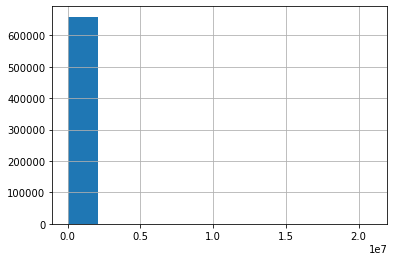

In [25]:
feat_len.hist()

<AxesSubplot:>

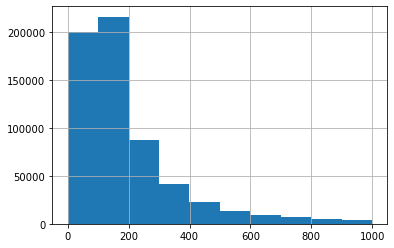

In [41]:
feat_len[feat_len < 1000].hist()

<AxesSubplot:>

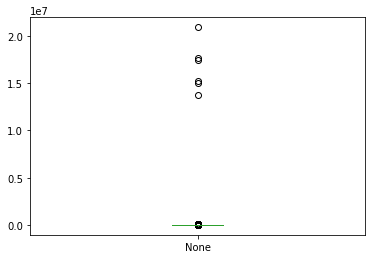

In [27]:
feat_len.plot.box()

_____ 

### - Find the genes between positions: 4000 and 10000.
    - Hint: start and end (4th and 5th columns in the file) need to be between these numbers.

In [ ]:
# conditional subsetting to select rows that meet the condition
# combine condition using & (bit-wise and operator) 
# use parantheses to evaluate the condition first 
# parantheses are needed because & has higher precedence than comparison operators (>, < , ==, ...)



In [ ]:
# Conditional subsetting to retrieve rows that meet the condition
# we use .loc attribute when we want to also subset the columns



In [28]:
worm_genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [32]:
c1 = worm_genome_df.type == "gene"
c2 = worm_genome_df.start > 4000
c3 = worm_genome_df.end < 10000
(c1 & c2 & c3).sum()

7

In [33]:
sum(c1 & c2 & c3)

7

In [37]:
cond = c1 & c2 & c3
worm_genome_df[cond]

,seqid,source,type,start,end,score,strand,phase,attributes
Feature93697,II,WormBase,gene,6664,9486,.,+,.,ID=gene:WBGene00015287;Name=osta-1;biotype=pro...
Feature434203,MtDNA,WormBase,gene,4504,5621,.,+,.,ID=gene:WBGene00000829;Name=ctb-1;biotype=prot...
Feature434211,MtDNA,WormBase,gene,5678,6449,.,+,.,ID=gene:WBGene00010962;Name=ctc-3;biotype=prot...
Feature434219,MtDNA,WormBase,gene,6506,7808,.,+,.,ID=gene:WBGene00010963;Name=nduo-4;biotype=pro...
Feature434224,MtDNA,WormBase,gene,7827,9428,.,+,.,ID=gene:WBGene00010964;Name=ctc-1;biotype=prot...
Feature434291,V,WormBase,gene,6588,7822,.,-,.,ID=gene:WBGene00002061;Name=ife-3;biotype=prot...
Feature434364,V,WormBase,gene,8575,8739,.,-,.,ID=gene:WBGene00255704;Name=B0348.10;biotype=p...


____

We have a file with the gene expression for 45h every three hours for breast cancer cells treated with a HER2 inhibitor, `GSE22955_small_gene_table.txt`.
This is in the class_notebooks folder.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22955

____

### <font color = "red">Exercise</font>

______

### - Select only 5 genes of interest from the expression data frame TP53, BARD1, BRCA1, MAPK1, CHEK2

In [38]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")

In [43]:
# import numpy as np
# import pandas as pd

gene_file_name = "GSE22955_small_gene_table.txt"
genes_df = pd.read_csv(gene_file_name, comment = "#", sep = "\t", index_col = 0 )
genes_df

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


In [44]:
important_genes

('TP53', 'BARD1', 'BRCA1', 'MAPK1', 'CHEK2')

In [45]:
selected_data = genes_df.loc[important_genes,]
selected_data


,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
TP53,9.200789,9.216372,9.050205,8.810025,9.228241,9.129489,9.071350,8.876624,8.701105,8.716909,8.430416,8.595401,8.520036,8.257401,8.218460,7.982049
BARD1,10.221535,10.701018,10.413019,10.139816,9.597768,9.822128,9.577566,9.318428,9.632759,9.462205,9.476985,9.339228,9.134728,9.157332,9.273025,9.558056
BRCA1,9.940983,10.037104,10.061594,9.833829,9.139316,8.980142,8.951006,8.806894,9.003011,8.885428,8.816547,8.724686,8.402657,8.386593,8.396024,8.605764
MAPK1,10.219226,10.129187,10.040317,9.765913,9.617056,9.417145,9.727285,9.632413,9.604481,9.375869,9.533505,9.526265,9.521666,9.490718,9.360262,9.597784
CHEK2,10.281308,10.158531,10.153390,10.126042,10.300719,10.281632,10.089970,10.184045,9.777084,9.990490,9.657020,9.736517,9.368978,9.328541,9.175359,9.412664


### - Plot the expression of these genes 

<AxesSubplot:xlabel='Symbol'>

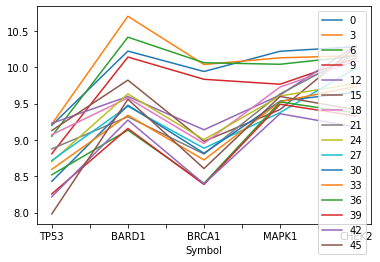

In [46]:
selected_data.plot()

In [48]:
# selected_data.plot?

In [49]:
selected_data.T

Symbol,TP53,BARD1,BRCA1,MAPK1,CHEK2
0,9.200789,10.221535,9.940983,10.219226,10.281308
3,9.216372,10.701018,10.037104,10.129187,10.158531
6,9.050205,10.413019,10.061594,10.040317,10.153390
9,8.810025,10.139816,9.833829,9.765913,10.126042
12,9.228241,9.597768,9.139316,9.617056,10.300719
15,9.129489,9.822128,8.980142,9.417145,10.281632
18,9.071350,9.577566,8.951006,9.727285,10.089970
21,8.876624,9.318428,8.806894,9.632413,10.184045
24,8.701105,9.632759,9.003011,9.604481,9.777084
27,8.716909,9.462205,8.885428,9.375869,9.990490


<AxesSubplot:>

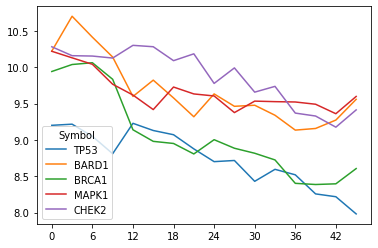

In [50]:
selected_data.T.plot()


### - Select only genes that have a standard dev > 0.7 and a change between hour 0 and hour 45 > 1.4 fold.


In [52]:
# selected_data.T.TP53.std?

In [53]:
selected_data.T.TP53.std()

0.39190184839938047

In [55]:
genes_df

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


In [54]:
genes_df.T.std()

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [56]:
genes_df.std(axis = 1)

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [58]:
genes_sd = genes_df.std(axis = 1)
genes_sd

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [59]:
genes_sd > 0.7

Symbol
ABCA1     False
ABCC11    False
ABCC3      True
ABLIM1    False
ABP1      False
          ...  
ZNF606    False
ZNF616    False
ZNF83     False
ZNFX1     False
ZWINT     False
Length: 1175, dtype: bool

In [60]:
genes_df.columns 

Index(['0', '3', '6', '9', '12', '15', '18', '21', '24', '27', '30', '33',
       '36', '39', '42', '45'],
      dtype='object')

In [61]:
genes_df.columns < "2" 

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [63]:
type(np.where(genes_df.columns < "2" ))

tuple

In [66]:
np.where(genes_df.columns < "2" )[0][0]

0

In [68]:
np.where(genes_df.columns == "0")[0][0]

0

In [69]:
np.where(genes_df.columns == "45")[0][0]

15

In [70]:
pos0 = np.where(genes_df.columns == "0")[0][0]
pos45 = np.where(genes_df.columns == "45")[0][0]

In [72]:
genes_df.iloc[:,pos0]

Symbol
ABCA1      7.497117
ABCC11     9.681143
ABCC3     12.834826
ABLIM1    10.786000
ABP1       7.943247
            ...    
ZNF606     8.528510
ZNF616     9.533892
ZNF83      9.363751
ZNFX1     10.854597
ZWINT     10.024858
Name: 0, Length: 1175, dtype: float64

In [75]:
genes_df.iloc[:,pos45]

Symbol
ABCA1     10.094392
ABCC11     8.703377
ABCC3     10.928790
ABLIM1    11.720621
ABP1       9.729671
            ...    
ZNF606     9.076324
ZNF616    10.225305
ZNF83      9.959197
ZNFX1     11.629349
ZWINT      8.141444
Name: 45, Length: 1175, dtype: float64

In [78]:
genes_fc0_45 = genes_df.iloc[:,-1]/genes_df.iloc[:,pos0]
genes_fc45_0 = genes_df.iloc[:,0]/genes_df.iloc[:,pos45]

In [79]:
c1 = genes_sd > 0.7
c2 = genes_fc0_45 > 1.4
c3 = genes_fc45_0 > 1.4

rel_genes = genes_df[c1 & (c2 | c3)]
rel_genes

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ADH1A,8.361994,8.827013,9.378511,10.566180,10.256555,10.407172,10.765887,11.121747,11.493566,11.771011,11.687379,12.114453,12.009896,12.204300,12.262426,12.550255
ADH1C,8.209849,8.367908,9.104123,10.062300,9.829055,10.213800,10.530419,10.707635,11.252292,11.370705,11.445012,11.786950,11.793588,11.939639,11.775485,11.926255
CCL2,12.619085,10.091347,9.562717,8.840072,9.008635,8.701372,8.561566,8.548134,8.454427,8.483174,8.257832,8.184132,8.188751,8.304568,8.349592,7.823147
CYP1A1,8.852036,10.607981,10.871058,11.003644,11.880618,11.771992,12.114453,12.089954,11.968187,11.716474,12.266210,12.208526,12.635865,12.350391,12.503475,12.692957
IL8,13.985411,11.492268,11.320368,10.591507,11.323523,10.572259,10.376082,10.481849,10.061828,10.021562,10.040720,10.002081,9.865461,9.820557,9.671547,9.690952


____

[ClinVar][1] is a freely accessible, public archive of reports of the relationships among human variations and phenotypes, with supporting evidence.


The data you will be working with (`clinvar.vcf`).  More information about the database can be found [here][3].

From: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/

Download the file clinvar.vcf.gz


### The file format
The beginning of every VCF file contains various sets of information:
* Meta-information (details about the experiment or configuration) lines start with **`##`**
    * These lines are helpful in understanding specialized keys found in the `INFO` column. It is in these sections that one can find:
        * The description of the key
        * The data type of the values
        * The default value of the values
* Header lines (column names) start with **`#`**

From there on, each line is made up of tab (`\t`) separated values that make up eight (8) columns. Those columns are:
1. CHROM (chromosome)
2. POS (base pair position of the variant)
3. ID (identifier if applicable; `.` if not applicable/missing)
4. REF (reference base)
5. ALT (alternate base(s): comma (`,`) separated if applicable)
6. QUAL (Phred-scaled quality score; `.` if not applicable/missing)
7. FILTER (filter status; `.` if not applicable/missing)
8. INFO (any additional information about the variant)
    * Semi-colon (`;`) separated key-value pairs
    * Key-value pairs are equal sign (`=`) separated (key on the left, value on the right)
    * If a key has multiple values, the values are pipe (`|`) separated

---
[1] https://www.ncbi.nlm.nih.gov/clinvar/intro/  
[2] https://samtools.github.io/hts-specs/VCFv4.3.pdf  
[3] http://exac.broadinstitute.org  



____

### <font color = "red">Exercise</font>

___

### - From the VCF file extract the variant position information and plot the distribution (histogram)


In [81]:
# import pandas as pd
vcf_data = pd.read_csv("clinvar_short.vcf", comment = "#", sep = "\t", header = None)


In [82]:
vcf_data.columns = ("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER","INFO")


In [83]:
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,1,1014012,661610,C,T,.,.,"ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:..."
1,1,1014042,475283,G,A,.,.,AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
2,1,1014047,639487,A,G,.,.,"ALLELEID=626469;CLNDISDB=MedGen:C4015293,OMIM:..."
3,1,1014111,659187,G,A,.,.,"ALLELEID=626470;CLNDISDB=MedGen:C4015293,OMIM:..."
4,1,1014122,542074,C,T,.,.,AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
...,...,...,...,...,...,...,...,...
967,1,2306313,676028,T,C,.,.,ALLELEID=657445;CLNDISDB=MedGen:CN517202;CLNDN...
968,1,2306534,674447,A,G,.,.,ALLELEID=657350;CLNDISDB=MedGen:CN517202;CLNDN...
969,1,2306561,388616,C,T,.,.,ALLELEID=364745;CLNDISDB=MedGen:CN169374;CLNDN...
970,1,2306568,463403,C,G,.,.,"ALLELEID=447533;CLNDISDB=MedGen:C1321551,OMIM:..."


<AxesSubplot:>

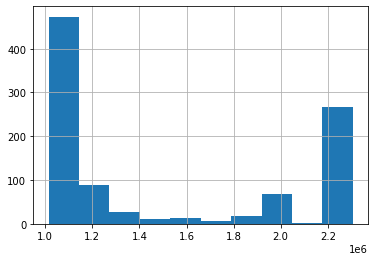

In [84]:
vcf_data.POS.hist()

In [87]:
vcf_data.INFO[0]


'ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014012C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1'

In [ ]:
# "GENEINFO=ISG15:9636|BRCA1:3456;"

### - From the VCF file identify the genes for each variant from the info column GENEINFO key - write a function that identifies the genes for each variant


In [94]:
def parse_info(info):
    gene_list = []
    for info_pair in info.split(";"):
        key, values = info_pair.split("=")
        print(key)
        print(values)
        print()
    return gene_list

info1 = vcf_data.INFO[0]
parse_info(info1)
    

ALLELEID
626468

CLNDISDB
MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563

CLNDN
Immunodeficiency_38_with_basal_ganglia_calcification

CLNHGVS
NC_000001.11:g.1014012C>T

CLNREVSTAT
criteria_provided,_single_submitter

CLNSIG
Uncertain_significance

CLNVC
single_nucleotide_variant

CLNVCSO
SO:0001483

GENEINFO
ISG15:9636

MC
SO:0001583|missense_variant

ORIGIN
1



[]

In [99]:
def parse_info(info):
    gene_list = []
    for pair in info.split(";"):
        key, value = pair.split("=")
        if key == "GENEINFO":
            #print(key, value)
            for gene_elem in value.split("|"):
                gene_sym, gene_id = gene_elem.split(":")
                gene_list.append(gene_sym)
        
    return gene_list

parse_info(vcf_data.INFO[0])

['ISG15']

In [100]:
info_test = "GENEINFO=ISG15:9636|BRCA1:3456;CLNVC=single_nucleotide_variant"
parse_info(info_test)

['ISG15', 'BRCA1']

In [ ]:
#vcf_data.INFO.apply?

In [102]:
variant_genes = vcf_data.INFO.apply(parse_info)
variant_genes

0      [ISG15]
1      [ISG15]
2      [ISG15]
3      [ISG15]
4      [ISG15]
        ...   
967      [SKI]
968      [SKI]
969      [SKI]
970      [SKI]
971      [SKI]
Name: INFO, Length: 972, dtype: object

In [101]:
vcf_data.INFO

0      ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:...
1      AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
2      ALLELEID=626469;CLNDISDB=MedGen:C4015293,OMIM:...
3      ALLELEID=626470;CLNDISDB=MedGen:C4015293,OMIM:...
4      AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
                             ...                        
967    ALLELEID=657445;CLNDISDB=MedGen:CN517202;CLNDN...
968    ALLELEID=657350;CLNDISDB=MedGen:CN517202;CLNDN...
969    ALLELEID=364745;CLNDISDB=MedGen:CN169374;CLNDN...
970    ALLELEID=447533;CLNDISDB=MedGen:C1321551,OMIM:...
971    AF_EXAC=0.00367;ALLELEID=209486;CLNDISDB=MedGe...
Name: INFO, Length: 972, dtype: object



### - Select only the variants for our 6 genes of interest from the expression data frame TP53, BARD1, BRCA1, MAPK1, CHEK2

In [106]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2", "SKI")

In [103]:
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,1,1014012,661610,C,T,.,.,"ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:..."
1,1,1014042,475283,G,A,.,.,AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
2,1,1014047,639487,A,G,.,.,"ALLELEID=626469;CLNDISDB=MedGen:C4015293,OMIM:..."
3,1,1014111,659187,G,A,.,.,"ALLELEID=626470;CLNDISDB=MedGen:C4015293,OMIM:..."
4,1,1014122,542074,C,T,.,.,AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
...,...,...,...,...,...,...,...,...
967,1,2306313,676028,T,C,.,.,ALLELEID=657445;CLNDISDB=MedGen:CN517202;CLNDN...
968,1,2306534,674447,A,G,.,.,ALLELEID=657350;CLNDISDB=MedGen:CN517202;CLNDN...
969,1,2306561,388616,C,T,.,.,ALLELEID=364745;CLNDISDB=MedGen:CN169374;CLNDN...
970,1,2306568,463403,C,G,.,.,"ALLELEID=447533;CLNDISDB=MedGen:C1321551,OMIM:..."


In [104]:
variant_genes

0      [ISG15]
1      [ISG15]
2      [ISG15]
3      [ISG15]
4      [ISG15]
        ...   
967      [SKI]
968      [SKI]
969      [SKI]
970      [SKI]
971      [SKI]
Name: INFO, Length: 972, dtype: object

In [105]:
def check_gene(gene_list, sel_genes):
    return (len(set(gene_list).intersection(sel_genes)) > 0)

In [112]:
gene_lst1 = ["SKI2"]


In [113]:
important_genes

('TP53', 'BARD1', 'BRCA1', 'MAPK1', 'CHEK2', 'SKI')

In [114]:
check_gene(gene_lst1, important_genes)

False

In [116]:
cond_check = variant_genes.apply(check_gene, sel_genes = important_genes)
cond_check

0      False
1      False
2      False
3      False
4      False
       ...  
967     True
968     True
969     True
970     True
971     True
Name: INFO, Length: 972, dtype: bool

In [117]:
vcf_data[cond_check]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
705,1,2228718,508030,G,T,.,.,ALLELEID=498427;CLNDISDB=MedGen:CN169374;CLNDN...
706,1,2228721,680378,C,T,.,.,ALLELEID=655067;CLNDISDB=MedGen:CN517202;CLNDN...
707,1,2228725,392772,G,A,.,.,ALLELEID=364806;CLNDISDB=MedGen:CN169374;CLNDN...
708,1,2228739,393061,G,T,.,.,ALLELEID=364809;CLNDISDB=MedGen:CN169374;CLNDN...
709,1,2228740,508459,G,GAGCGGC,.,.,ALLELEID=498215;CLNDISDB=MedGen:CN169374;CLNDN...
...,...,...,...,...,...,...,...,...
967,1,2306313,676028,T,C,.,.,ALLELEID=657445;CLNDISDB=MedGen:CN517202;CLNDN...
968,1,2306534,674447,A,G,.,.,ALLELEID=657350;CLNDISDB=MedGen:CN517202;CLNDN...
969,1,2306561,388616,C,T,.,.,ALLELEID=364745;CLNDISDB=MedGen:CN169374;CLNDN...
970,1,2306568,463403,C,G,.,.,"ALLELEID=447533;CLNDISDB=MedGen:C1321551,OMIM:..."


In [118]:
vcf_data.loc[:,:"ALT"].join(variant_genes)

,CHROM,POS,ID,REF,ALT,INFO
0,1,1014012,661610,C,T,[ISG15]
1,1,1014042,475283,G,A,[ISG15]
2,1,1014047,639487,A,G,[ISG15]
3,1,1014111,659187,G,A,[ISG15]
4,1,1014122,542074,C,T,[ISG15]
...,...,...,...,...,...,...
967,1,2306313,676028,T,C,[SKI]
968,1,2306534,674447,A,G,[SKI]
969,1,2306561,388616,C,T,[SKI]
970,1,2306568,463403,C,G,[SKI]


In [119]:
# select only the columns up to ALT since 
# we do not need the extra information and
# these columns uniquely identify the variant
# .loc[:,:"ALT"]
# add the column with the gene list 
# .join(variant_genes)
# select only the rows that have genes in our
# tuple of important genes as retrieved in the 
# logical vector in the series cond_check
# [cond_check]

vcf_data.loc[:,:"ALT"].join(variant_genes)[cond_check]

,CHROM,POS,ID,REF,ALT,INFO
705,1,2228718,508030,G,T,[SKI]
706,1,2228721,680378,C,T,[SKI]
707,1,2228725,392772,G,A,[SKI]
708,1,2228739,393061,G,T,[SKI]
709,1,2228740,508459,G,GAGCGGC,[SKI]
...,...,...,...,...,...,...
967,1,2306313,676028,T,C,[SKI]
968,1,2306534,674447,A,G,[SKI]
969,1,2306561,388616,C,T,[SKI]
970,1,2306568,463403,C,G,[SKI]


In [122]:
var_wlst = vcf_data.loc[:,:"ALT"].join(variant_genes)
var_wlst[cond_check]

,CHROM,POS,ID,REF,ALT,INFO
705,1,2228718,508030,G,T,[SKI]
706,1,2228721,680378,C,T,[SKI]
707,1,2228725,392772,G,A,[SKI]
708,1,2228739,393061,G,T,[SKI]
709,1,2228740,508459,G,GAGCGGC,[SKI]
...,...,...,...,...,...,...
967,1,2306313,676028,T,C,[SKI]
968,1,2306534,674447,A,G,[SKI]
969,1,2306561,388616,C,T,[SKI]
970,1,2306568,463403,C,G,[SKI]


In [123]:
vcf_data.loc[:,:"ALT"].join(variant_genes)[cond_check].to_csv("var_sel_genes.tsv", sep = "\t")